# Introduction / Business Problem

Car accidents are one of the most common issue found across the globe to be severe.Accidents might sometimes be due to oue negligence or due to natural reasons or anything. Sometimes, we might be too lazy or negligent to drive costing our lives as well as the others. Whereas sometimes, due to heavy rain or heavy gales etc. We might unknowingly droop into accident with the other car. Whatever the reason maybe, car accident not only lead to property damage but cause injuries and sometimes even leading to people's death. In our project we decide how these accidents occur due to weather conditions.So, the main problem or question arising in this depressing situation is

"what is the severity of these car accidents ? " 
"What are their causes?" 
 and 
"How to curb or slow down them ?"

# Data Section

We have several attributes in our dataset which tell us about the severity of these accidents.attributes like WEATHER, ROADCOND, LIGHTCOND, JUNCTIONTYPE can tell us about the accidents which happen naturally.And attributes like SEVERITYDESC and COLLISIONTYPE help us decide how these accidents take place. Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

- 0 : Little to no Probability (Clear Weather Conditions)
- 1 : Very Low Probability - Chance or Property Damage
- 2 : Low Probability - Chance of Injury
- 3 : Mild Probability - Chance of Serious Injury
- 4 : High Probability - Chance of Fatality

So depending on these severity codes, we decide the extent of severity of accidents due to these these weather conditions. 

## Data Pre-Processing and Exploration

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:/Users/Harpreet/Downloads/Data-Collisions.csv')
df

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [62]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [63]:
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [64]:
df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [65]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

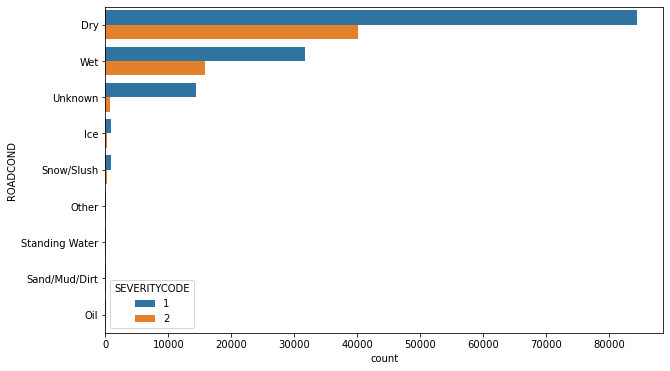

In [66]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='ROADCOND', hue='SEVERITYCODE',data=df,order=df['ROADCOND'].value_counts().index)

In [67]:
df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [68]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

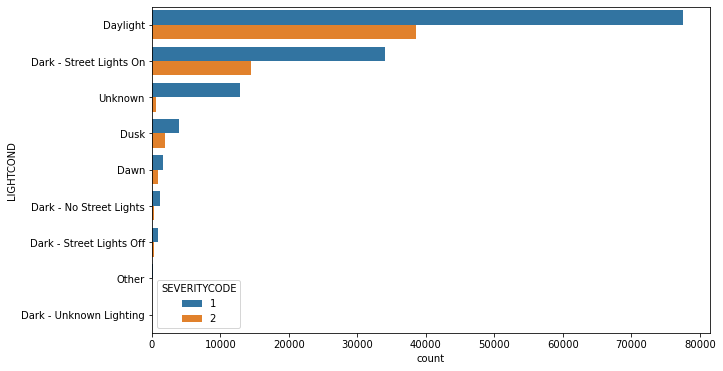

In [69]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='LIGHTCOND', hue='SEVERITYCODE',data=df,order=df['LIGHTCOND'].value_counts().index)

In [70]:
df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [71]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

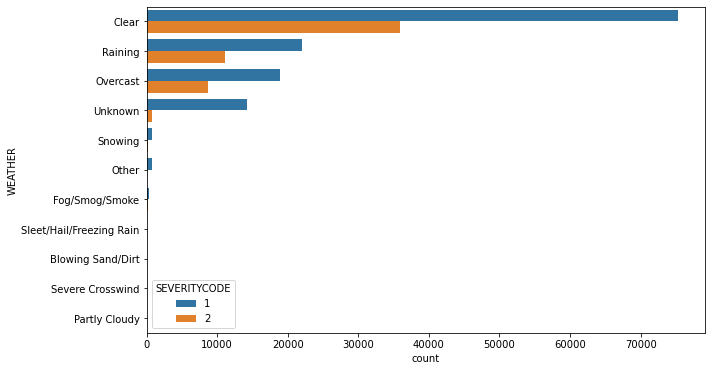

In [72]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='WEATHER', hue='SEVERITYCODE',data=df,order=df['WEATHER'].value_counts().index)

In [73]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [74]:
df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793978
               2               0.206022
Sideswipe      1               0.865334
               2               0.134666
Name: SEVERITYCODE, dtype: float64

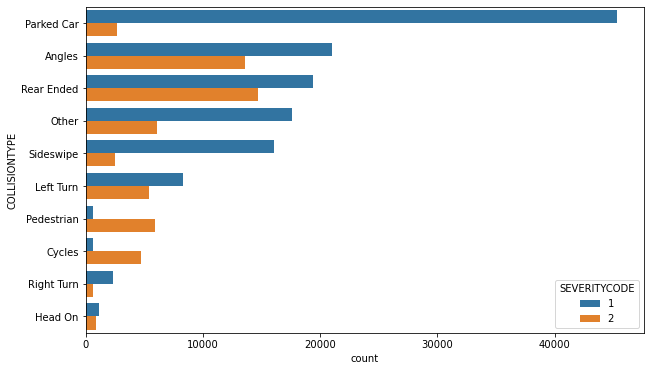

In [75]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y='COLLISIONTYPE', hue='SEVERITYCODE',data=df,order=df['COLLISIONTYPE'].value_counts().index)

In [76]:
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [77]:
df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

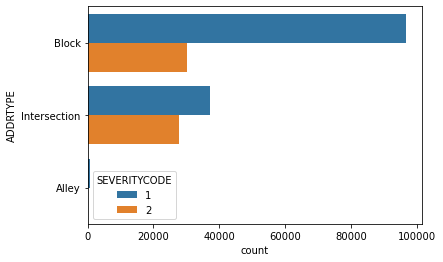

In [78]:
sns.countplot(y='ADDRTYPE', hue='SEVERITYCODE',data=df, order=df['ADDRTYPE'].value_counts().index)

63% intersection accident is severe 2 while only 42% block accident is severe 2

In [79]:
df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [80]:
df.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCOUNT  SEVERITYCODE
0         1               0.723295
          2               0.276705
1         2               0.898579
          1               0.101421
2         2               0.915929
          1               0.084071
3         2               0.954545
          1               0.045455
4         2               1.000000
5         2               1.000000
6         2               1.000000
Name: SEVERITYCODE, dtype: float64

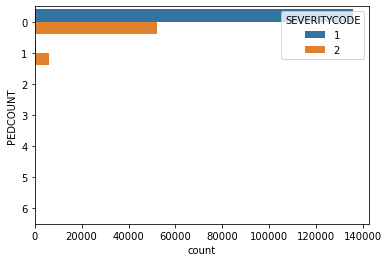

In [81]:
sns.countplot(y="PEDCOUNT", hue="SEVERITYCODE", data=df)

In [82]:
df2 = df[["SEVERITYCODE" , "ROADCOND" , "LIGHTCOND" , "WEATHER"]]
df2.head(5)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [83]:
df2.replace("Unknown", np.nan ,inplace=True)
df2.head(20)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining
5,1,Dry,Daylight,Clear
6,1,Wet,Daylight,Raining
7,2,Dry,Daylight,Clear
8,1,Dry,Daylight,Clear
9,2,Dry,Daylight,Clear


In [84]:
df2.dropna(subset=["LIGHTCOND" , "ROADCOND" , "WEATHER" ] , axis= 0 , inplace = True)
df2.reset_index(drop = True , inplace = True)
df2.head(20)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining
5,1,Dry,Daylight,Clear
6,1,Wet,Daylight,Raining
7,2,Dry,Daylight,Clear
8,1,Dry,Daylight,Clear
9,2,Dry,Daylight,Clear


### Resampling(Undersampling) to create balanced datasheet

In [85]:
df2["SEVERITYCODE"].value_counts()

1    114659
2     55851
Name: SEVERITYCODE, dtype: int64

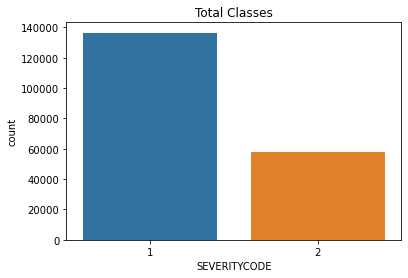

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.countplot('SEVERITYCODE', data=df)
plt.title('Total Classes')
plt.show()

In [87]:
df2["WEATHER"] = df2["WEATHER"].astype('category')
df2["ROADCOND"] = df2["ROADCOND"].astype('category')
df2["LIGHTCOND"] = df2["LIGHTCOND"].astype('category')

In [88]:
from sklearn.utils import resample

In [89]:
df2_maj = df2[df2.SEVERITYCODE==1]
df2_min = df2[df2.SEVERITYCODE==2]

df2_maj_resample = resample(df2_maj, replace=False, n_samples=55851, random_state=123)

df3 = pd.concat([df2_maj_resample, df2_min])
df3.SEVERITYCODE.value_counts()

2    55851
1    55851
Name: SEVERITYCODE, dtype: int64

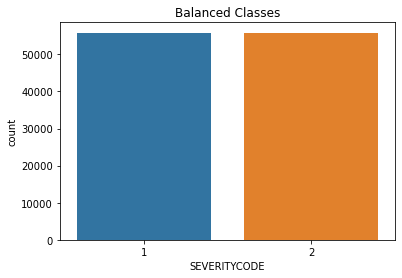

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.countplot('SEVERITYCODE', data=df3)
plt.title('Balanced Classes')
plt.show()

In [91]:
df3.reset_index(drop=True, inplace=True)
df3.head(10)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,1,Dry,Daylight,Clear
1,1,Dry,Dark - Street Lights On,Clear
2,1,Dry,Daylight,Clear
3,1,Wet,Daylight,Clear
4,1,Dry,Dark - Street Lights On,Clear
5,1,Dry,Daylight,Clear
6,1,Dry,Dark - Street Lights On,Clear
7,1,Dry,Daylight,Clear
8,1,Dry,Daylight,Clear
9,1,Dry,Daylight,Clear


In [92]:
df3.tail(10)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
111692,2,Dry,Daylight,Clear
111693,2,Wet,Dark - Street Lights On,Overcast
111694,2,Dry,Daylight,Clear
111695,2,Wet,Other,Raining
111696,2,Dry,Daylight,Clear
111697,2,Wet,Daylight,Raining
111698,2,Wet,Daylight,Clear
111699,2,Dry,Daylight,Clear
111700,2,Dry,Daylight,Clear
111701,2,Dry,Dusk,Clear


In [93]:
df3["WEATHER_NUM"] = df3["WEATHER"].cat.codes
df3["ROADCOND_NUM"] = df3["ROADCOND"].cat.codes
df3["LIGHTCOND_NUM"] = df3["LIGHTCOND"].cat.codes

In [94]:
df3.head(10)

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,WEATHER_NUM,ROADCOND_NUM,LIGHTCOND_NUM
0,1,Dry,Daylight,Clear,1,0,5
1,1,Dry,Dark - Street Lights On,Clear,1,0,2
2,1,Dry,Daylight,Clear,1,0,5
3,1,Wet,Daylight,Clear,1,7,5
4,1,Dry,Dark - Street Lights On,Clear,1,0,2
5,1,Dry,Daylight,Clear,1,0,5
6,1,Dry,Dark - Street Lights On,Clear,1,0,2
7,1,Dry,Daylight,Clear,1,0,5
8,1,Dry,Daylight,Clear,1,0,5
9,1,Dry,Daylight,Clear,1,0,5


In [95]:
X = np.asarray(df3[['WEATHER_NUM' , 'ROADCOND_NUM' , 'LIGHTCOND_NUM']])
X[0:5]

array([[1, 0, 5],
       [1, 0, 2],
       [1, 0, 5],
       [1, 7, 5],
       [1, 0, 2]], dtype=int8)

In [96]:
y = np.asarray(df3['SEVERITYCODE'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [97]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.71024412, -0.625086  ,  0.59417262],
       [-0.71024412, -0.625086  , -1.50252518],
       [-0.71024412, -0.625086  ,  0.59417262],
       [-0.71024412,  1.61670159,  0.59417262],
       [-0.71024412, -0.625086  , -1.50252518]])

# Modeling And Evaluation

In [98]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Train and test 

In [99]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print('Train set rows:', X_train.shape[0])
print('Test set rows:',X_test.shape[0])

Train set rows: 78191
Test set rows: 33511


## KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred[0:5]

array([2, 2, 2, 2, 1], dtype=int64)

In [101]:
Ks=20
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    knn_y_pred = knn.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(knn_y_pred==y_test);
    
    std_acc[n-1]=np.std(knn_y_pred==y_test)/np.sqrt(knn_y_pred.shape[0])
mean_acc

array([0.49712035, 0.48724299, 0.49834383, 0.49661305, 0.50628152,
       0.5069977 , 0.5069977 , 0.50687834, 0.50469995, 0.50643072,
       0.50455074, 0.49646385, 0.50064158, 0.49998508, 0.50004476,
       0.48813822, 0.49944794, 0.50884784, 0.50777357])

Plot

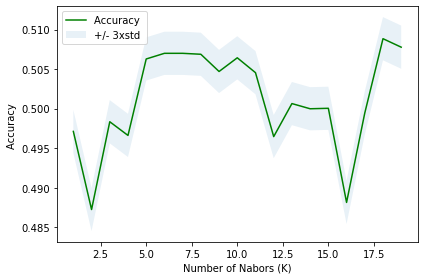

In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [103]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5088478410074304 with k= 18


In [104]:
#Best k is 18
k = 18
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred[0:5]

array([2, 2, 1, 2, 1], dtype=int64)

In [105]:
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_y_pred))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_y_pred, average='weighted') )

KNN Jaccard index: 0.31
KNN F1-score: 0.51


## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 7)

dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [107]:
dt_y_pred = dt.predict(X_test)

In [108]:
print("DT Jaccard index: %.2f" % jaccard_score(y_test,dt_y_pred))
print("DT f1-score: %.2f" % f1_score(y_test, dt_y_pred, average='weighted'))

DT Jaccard index: 0.19
DT f1-score: 0.47


## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)

In [110]:
LR_y_pred = LR.predict(X_test) 

In [111]:
LR_y_prob = LR.predict_proba(X_test)

In [112]:
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_y_pred))
print("LR F1-score: %.2f" % f1_score(y_test, LR_y_pred, average='weighted'))
print("LR Logloss: %.2f" % log_loss(y_test, LR_y_prob))

LR Jaccard index: 0.28
LR F1-score: 0.51
LR Logloss: 0.69


## Accuracy

In [113]:
from sklearn.metrics import accuracy_score
print("KNN Accuracy :", accuracy_score(y_test, knn_y_pred))

KNN Accuracy : 0.5088478410074304


In [114]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))

Decision Tree Accuracy: 0.5192921727194055


In [115]:
print("LR Accuracy :", accuracy_score(y_test, LR_y_pred))

LR Accuracy : 0.5180686938617171


# Result

|Algorithm||Jaccard||F1-score||LogLoss||Accuracy|
|---------||-------||--------||-------||--------|
|KNN||0.31||0.51||NA||0.51|
|DecisionTree||0.19||0.47||NA||0.52|
|LogisticRegression||0.28||0.51||0.69||0.51|